# Imports

In [1]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from joblib import dump

import plotly.express as px
import plotly.io as pio

pio.renderers.default = "png"

# Reading and Organizing Data

In [2]:
data = pd.read_csv('can.csv')

In [3]:
data = data.drop([539, 540, 541])
data

,Date,Cases,Deaths,Tests,Cases/Population,Diff Cases/Population,Deaths/Cases,Tests/Cases
0,2020-01-22,1.0,0.0,0.0,0.000003,NaN,0.000000,0.000000
1,2020-01-23,1.0,0.0,0.0,0.000003,0.000000,0.000000,0.000000
2,2020-01-24,2.0,0.0,0.0,0.000005,0.000003,0.000000,0.000000
3,2020-01-25,2.0,0.0,0.0,0.000005,0.000000,0.000000,0.000000
4,2020-01-26,2.0,0.0,0.0,0.000005,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...
534,2021-07-13,1429029.0,26414.0,37564476.0,3.801620,0.000904,1.848388,2628.671357
535,2021-07-14,1429369.0,26427.0,37613760.0,3.802525,0.000904,1.848858,2631.494037
536,2021-07-15,1429747.0,26436.0,37679387.0,3.803530,0.001006,1.848998,2635.388429
537,2021-07-16,1430127.0,26450.0,37747547.0,3.804541,0.001011,1.849486,2639.454188


In [4]:
df1 = data[['Cases', 'Deaths']]
df2 = data[['Cases', 'Tests']]

In [5]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(df1['Cases'], df1['Deaths'], test_size=0.2, random_state=42)

X_train1 = np.array(X_train1).reshape(-1,1)
y_train1 = np.array(y_train1).reshape(-1,1)
X_test1 = np.array(X_test1).reshape(-1,1)
y_test1 = np.array(y_test1).reshape(-1,1)

# Plotting Relationships

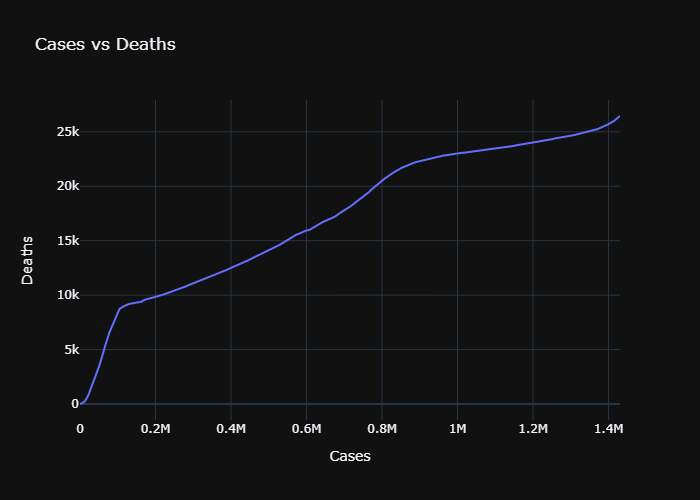

In [6]:
fig = px.line(df1, x='Cases', y='Deaths', template = "plotly_dark", title = "Cases vs Deaths")

fig.show()

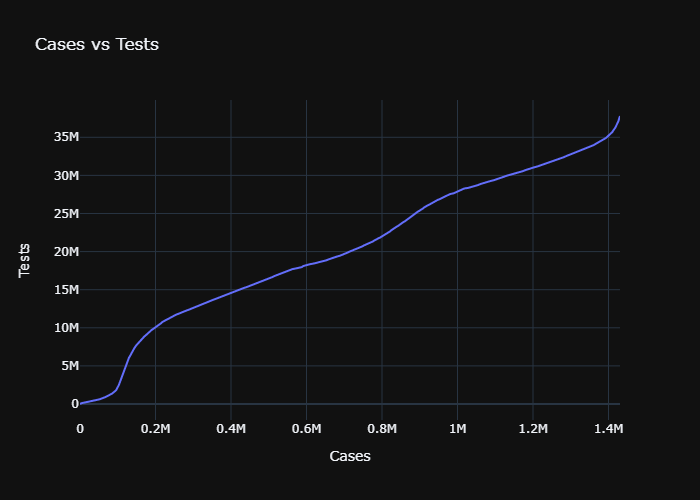

In [7]:
fig = px.line(df2, x='Cases', y='Tests', template = "plotly_dark", title = "Cases vs Tests")

fig.show()

# Model Training and Set up

In [8]:
linear_model = LinearRegression()

In [9]:
linear_model.fit(X_train1, y_train1)

LinearRegression()

# Evaluating Accuracy Metrics

In [10]:
acc = linear_model.score(X_test1, y_test1)
print(f'Model Accuracy: {acc*100}%')

Model Accuracy: 90.6077493181573%


In [11]:
preds1 = linear_model.predict(np.array(df1['Cases']).reshape(-1,1))

In [12]:
info1_pred = pd.DataFrame({'Type': ['Linear Model']*539, 'Cases': df1['Cases'], 'Deaths': preds1.reshape(-1)})
info1_true = pd.DataFrame({'Type': ['True Data']*539, 'Cases': df1['Cases'], 'Deaths': df1['Deaths']})

final1 = pd.concat([info1_true, info1_pred])

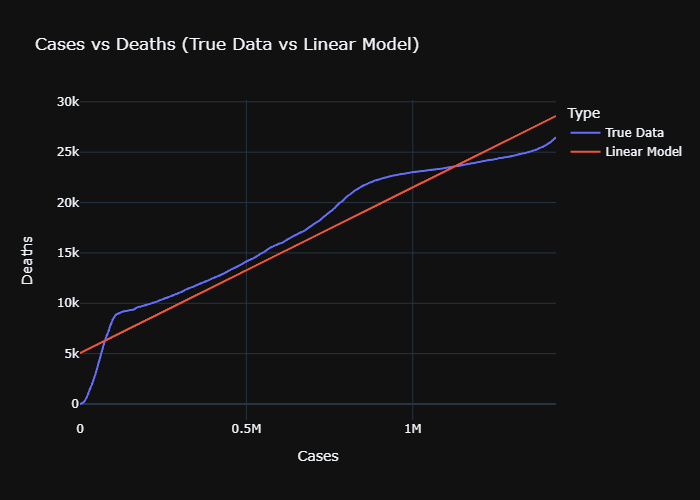

In [15]:
fig = px.line(final1, x='Cases', y='Deaths', color='Type', template = "plotly_dark", title = 'Cases vs Deaths (True Data vs Linear Model)')
fig.show()

In [30]:
x = linear_model.predict([[2000000]])
print(f'Model prediction for 2 million cases in Canada: {int(round(x[0][0],-1))} Deaths')
print('-'*50)

Model prediction for 2 million cases in Canada: 37970 Deaths
--------------------------------------------------


# Saving Model/Information

In [16]:
dump(linear_model, 'lin_model1.joblib')
final1.to_csv('linear-graph.csv', index=False)